In [43]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from utils import (
    crop_image,
    CLAHE,
    get_spesific_class,
)
    

In [4]:
mlb = MultiLabelBinarizer()

In [29]:
DATA_TRAIN = "/Users/khawaritzmi/GAIA_partime/Ocular/dataset/ODIR-5K/ODIR-5K/Training Images"
DATA_TEST = "/Users/khawaritzmi/GAIA_partime/Ocular/dataset/ODIR-5K/ODIR-5K/Testing Images"

In [72]:
data = pd.read_json("/Users/khawaritzmi/GAIA_partime/Ocular/eye-disease-detection-v2/train/label_prepared.json")
data.head(10)

,filename,keywords,label
0,0_left.jpg,[cataract],[C]
1,1_left.jpg,[normal fundus],[N]
2,2_left.jpg,"[laser spot, moderate non proliferative retino...","[O, D]"
3,3_left.jpg,[normal fundus],[N]
4,4_left.jpg,[macular epiretinal membrane],[O]
5,5_left.jpg,[moderate non proliferative retinopathy],[D]
6,6_left.jpg,[macular epiretinal membrane],[O]
7,7_left.jpg,[drusen],[O]
8,8_left.jpg,[normal fundus],[N]
9,9_left.jpg,[normal fundus],[N]


2024-03-26 14:59:45.220881: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-26 14:59:45.222014: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M2

systemMemory: 24.00 GB
maxCacheSize: 8.00 GB



(1, 198, 200, 3)

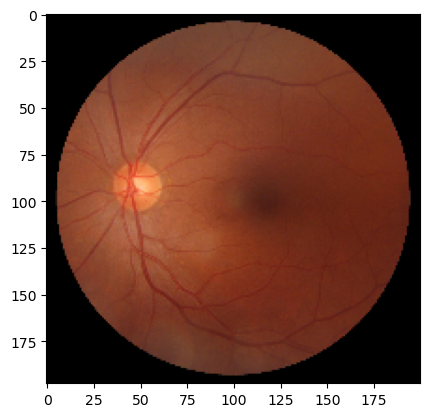

In [19]:
#before CLAHE processing
source = '/Users/khawaritzmi/GAIA_partime/Ocular/dataset/ODIR-5K/ODIR-5K/Training Images/112_left.jpg'
test = crop_image(source)
test = np.array(test)
img = tf.keras.preprocessing.image.array_to_img(test)
plt.imshow(img)
test = np.expand_dims(test, axis=0)
test.shape

(1, 200, 200, 3)

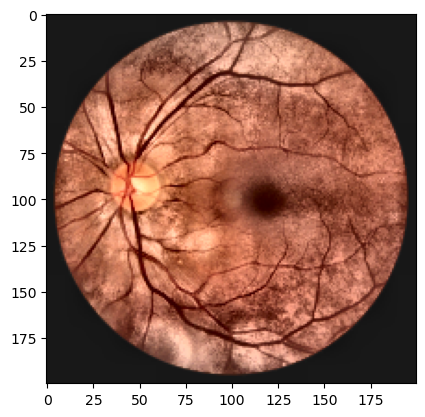

In [24]:
#showing CLAHE image Preprocessing
source = '/Users/khawaritzmi/GAIA_partime/Ocular/dataset/ODIR-5K/ODIR-5K/Training Images/112_left.jpg'
test = CLAHE(source, (200,200), 20, (10,10))
test = np.array(test)
img = tf.keras.preprocessing.image.array_to_img(test)
plt.imshow(img)
test = test.reshape(1, 200, 200, 3)
test.shape

In [11]:
data.label

0          [C]
1          [N]
2       [O, D]
3          [N]
4          [O]
         ...  
6563       [D]
6564       [D]
6565       [N]
6566       [D]
6567    [H, A]
Name: label, Length: 6568, dtype: object

In [25]:
target_size = (230, 230)
# color_mode = 'grayscale'
color_mode = 'rgb'
if color_mode == 'grayscale':
  shapeadd = (1,)
if color_mode == 'rgb':
  shapeadd = (3,)

In [32]:
# Delete image that is not in the dataframe
unlisted = []

for image in os.listdir(DATA_TRAIN):
  if image in data['filename'].values.tolist():
    continue
  else:
    unlisted.append(image)

print(unlisted)

for image in unlisted:
  os.remove(DATA_TRAIN + "/" + image)

['201_right.jpg', '989_right.jpg', '3277_left.jpg', '3118_left.jpg', '3119_left.jpg', '2578_left.jpg', '3233_right.jpg', '882_left.jpg', '2756_left.jpg', '3280_right.jpg', '3413_right.jpg', '2214_right.jpg', '2629_left.jpg', '3024_right.jpg', '465_left.jpg', '2546_left.jpg', '2721_left.jpg', '372_right.jpg', '833_right.jpg', '3118_right.jpg', '2661_left.jpg', '2495_left.jpg', '3947_right.jpg', '2494_left.jpg', '1999_left.jpg', '2208_left.jpg', '1401_left.jpg', '222_left.jpg', '4066_right.jpg', '1475_right.jpg', '1369_right.jpg', '3053_left.jpg', '324_right.jpg', '637_left.jpg', '4149_left.jpg', '2241_left.jpg', '1540_left.jpg', '1131_right.jpg', '3181_left.jpg', '1062_left.jpg', '3164_left.jpg', '3053_right.jpg', '3265_right.jpg', '2922_right.jpg', '793_left.jpg', '2870_right.jpg', '2727_right.jpg', '36_right.jpg', '3024_left.jpg', '3320_left.jpg', '895_left.jpg', '2741_left.jpg', '4448_left.jpg', '2214_left.jpg', '232_right.jpg', '3413_left.jpg', '1984_left.jpg', '2448_right.jpg', '26

In [51]:
# Fit the multi-label binarizer on the training set
print("Labels:")
bin_label = list(data['label'])
mlb.fit(bin_label)

# Loop over all labels and show them
N_LABELS = len(mlb.classes_)
for (i, label) in enumerate(mlb.classes_):
    print("{}. {}".format(i, label))

Labels:
0. A
1. C
2. D
3. G
4. H
5. M
6. N
7. O


In [85]:
data.head(50)

,filename,keywords,label
0,0_left.jpg,[cataract],[C]
1,1_left.jpg,[normal fundus],[N]
2,2_left.jpg,"[laser spot, moderate non proliferative retino...","[O, D]"
3,3_left.jpg,[normal fundus],[N]
4,4_left.jpg,[macular epiretinal membrane],[O]
5,5_left.jpg,[moderate non proliferative retinopathy],[D]
6,6_left.jpg,[macular epiretinal membrane],[O]
7,7_left.jpg,[drusen],[O]
8,8_left.jpg,[normal fundus],[N]
9,9_left.jpg,[normal fundus],[N]


In [57]:
if "K" in data.label[2]:
    print("ok")
else:
    print("nah")

nah


In [89]:
data.iloc[0]

filename    0_left.jpg
keywords    [cataract]
label              [C]
Name: 0, dtype: object

In [96]:
temp_data = []
for idx,i in enumerate(data.label):
    if 'N' in i:
        temp_data.append(True)
    else:
        temp_data.append(False)

data[temp_data]

,filename,keywords,label
1,1_left.jpg,[normal fundus],[N]
3,3_left.jpg,[normal fundus],[N]
8,8_left.jpg,[normal fundus],[N]
9,9_left.jpg,[normal fundus],[N]
14,14_left.jpg,[normal fundus],[N]
...,...,...,...
6537,4642_right.jpg,[normal fundus],[N]
6539,4644_right.jpg,[normal fundus],[N]
6549,4660_right.jpg,[normal fundus],[N]
6553,4671_right.jpg,[normal fundus],[N]


In [84]:
data['label'][0][0]

'C'

In [52]:
# transform the targets of the training and test sets
bin_label = mlb.transform(bin_label)

In [38]:
# Create a list containing path to locate images

filenames = [os.path.join(DATA_TRAIN, str(f)) for f in data['filename']]
filenames[:3]

['/Users/khawaritzmi/GAIA_partime/Ocular/dataset/ODIR-5K/ODIR-5K/Training Images/0_left.jpg',
 '/Users/khawaritzmi/GAIA_partime/Ocular/dataset/ODIR-5K/ODIR-5K/Training Images/1_left.jpg',
 '/Users/khawaritzmi/GAIA_partime/Ocular/dataset/ODIR-5K/ODIR-5K/Training Images/2_left.jpg']

In [41]:
# Create a list containing CLAHE images
images = []

# Wrap the loop with tqdm to create a progress bar
for name in tqdm(filenames, desc="Processing images"):
    images.append(CLAHE(name, target_size, 20, (10, 10)))

Processing images: 100%|██████████| 6568/6568 [04:22<00:00, 25.00it/s]


In [54]:
bin_label[2]

array([0, 0, 1, 0, 0, 0, 0, 1])

In [67]:
data["label"][0] == '[C]'

False

In [71]:
# Example DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],
        'Class': ['A', 'B', 'A', 'C'],
        'Score': [85, 90, 88, 75]}
df = pd.DataFrame(data)

# Specify the class you want to filter
desired_class = 'A'

# Create a boolean mask for rows with the desired class
mask = df['Class'] == desired_class

# Use the mask to filter rows
sub_df = df[mask]
sub_df

,Name,Class,Score
0,Alice,A,85
2,Charlie,A,88


In [91]:
mask

0     True
1    False
2     True
3    False
Name: Class, dtype: bool

In [92]:
data_C = data['label'] == 'C'
data_C

0       False
1       False
2       False
3       False
4       False
        ...  
6563    False
6564    False
6565    False
6566    False
6567    False
Name: label, Length: 6568, dtype: bool

In [77]:
_data = data.loc[(data["label"] == 'C')]
_data

KeyError: 'False: boolean label can not be used without a boolean index'

In [58]:
def has_disease(text, disease_name):
    if disease_name in text:
        return 1
    else:
        return 0
    
def get_spesific_class(dataset, disease_name, disease_code):
    df = dataset.copy()
    
    w_disease = df[

    return w_disease


In [45]:
images = np.stack(images, axis=0)

training_features, temp_validation_features, training_labels, temp_validation_labels, training_filenames, temp_validation_filenames, training_key, temp_validation_key = train_test_split(images, 
                                                                                                                                                                                        bin_label, 
                                                                                                                                                                                        filenames, 
                                                                                                                                                                                        data['label'].values.tolist(), 
                                                                                                                                                                                        test_size=0.102, 
                                                                                                                                                                                        random_state=1)

validation_features, validation_test_features, validation_labels, validation_test_labels, validation_filenames, validation_test_filenames, validation_key, validation_test_key = train_test_split(temp_validation_features, 
                                                                                                                                                                                                temp_validation_labels, 
                                                                                                                                                                                                temp_validation_filenames, 
                                                                                                                                                                                                temp_validation_key, 
                                                                                                                                                                                                test_size=0.02, 
                                                                                                                                                                                                random_state=1)

print("n training :", len(training_filenames))
print("n validation :", len(validation_filenames))
print("n validation test :", len(validation_test_filenames))

#delete temporary list file for minimalizing memory usage
del images
del bin_label
del temp_validation_features
del temp_validation_labels
del temp_validation_filenames

n training : 5898
n validation : 656
n validation test : 14


In [46]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                rotation_range=30,
                                #width_shift_range=0.2,
                                #height_shift_range=0.2,
                                #shear_range=0.2,
                                #zoom_range=0.2,
                                horizontal_flip=True,
                                #fill_mode='nearest'
                                )

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow(training_features,
                                    y=training_labels,
                                    batch_size=32,
                                    )

validation_generator = validation_datagen.flow(validation_features,
                                            y=validation_labels,
                                            batch_size=32
                                            )

In [47]:
# Create the base model from the pre-trained model MobileNet V2
input_shape = target_size + shapeadd
base_model = tf.keras.applications.VGG16(input_shape=input_shape,
                                         include_top=False,
                                         weights='imagenet')